### Python DA Assignment
# 1. Data Cleaning and Preparation:
1. Remove duplicates and irrelevant columns.
2. Handle missing values appropriately.
3. Convert data types for columns such as dates and numerical values.

In [ ]:
import pandas as pd
import numpy as np
import pickle
from datetime import time, timedelta

# Contacts

In [ ]:
contacts = pd.read_excel('Contacts (Done).xlsx', dtype={'Id': str}) 

In [ ]:
# Removing duplicates
print('Duplicated:',contacts.duplicated().sum())
contacts = contacts.drop_duplicates(ignore_index= True)
display(contacts)
contacts.info()

In [ ]:
# Saving the number of rows before removing duplicates
initial_rows = len(contacts)
# Removing empty rows
contacts = contacts.dropna(how='all')
contacts.reset_index(drop=True, inplace=True)

# Counting the number of rows after removing duplicates
final_rows = len(contacts)

# Outputting the number of removed rows
print(f"Removed: {initial_rows - final_rows}")

In [ ]:
# Getting a list of unique values in each column
unique_values = {col: contacts[col].unique() for col in contacts.columns}
for col, values in unique_values.items():
    print(f"\nUnique values in column '{col}':")
    print(values)
# Checking the number of unique values in each column
contacts.nunique()

## Analysis and Suggestions on Data Types: 
The contacts dataframe contains a total of 18548 rows. 
- **Created Time , Modified Time** - changing to datetime for further time series analysis.
- **Contact Owner Name** -  changing to categorical data type.

In [ ]:
contacts['Modified Time'] = pd.to_datetime(contacts['Modified Time'], format='%d.%m.%Y %H:%M')
contacts['Created Time'] = pd.to_datetime(contacts['Created Time'], format='%d.%m.%Y %H:%M')
contacts['Contact Owner Name'] = contacts['Contact Owner Name'].astype('category')
contacts.head()

In [ ]:
# Analyzing the number of contacts.
contacts['Contact Owner Name'].value_counts()

### Incorrect entry in the 'Contact Owner Name' column - FALSE

In [ ]:
contacts['Contact Owner Name'] = contacts['Contact Owner Name'].replace("False", "Unknown")

In [ ]:
contacts.info()

In [ ]:
# Saving the dataframe to a .pkl file for easy loading in Jupyter Notebook
contacts.to_pickle('contacts_df.pkl')

In [ ]:
# contacts = pd.read_pickle('contacts_df.pkl')

In [ ]:
contacts.to_excel('contacts_df.xlsx', index=False)

# Calls

In [ ]:
calls = pd.read_excel("Calls (Done).xlsx", dtype = {"Id": 'str', "CONTACTID": 'str'})

In [ ]:
print('Duplicated:',calls.duplicated().sum())
calls = calls.drop_duplicates(ignore_index= True)
display(calls)
calls.info()
display(calls.describe())

In [ ]:
initial_rows = len(calls)
# Removing empty rows
calls = calls.dropna(how='all')
calls.reset_index(drop=True, inplace=True)
final_rows = len(calls)
# Outputting the number of removed rows
print(f"Removed: {initial_rows - final_rows}")

In [ ]:
# Getting a list of unique values in each column
unique_values = {col: calls[col].unique() for col in calls.columns}
for col, values in unique_values.items():
    print(f"\nUnique values in column '{col}':")
    print(values)
calls.nunique()

### Removing unnecessary columns (do not carry any information)

In [ ]:
calls = calls.drop(columns=['Dialled Number', 'Tag'])

### Deleting rows with missing values in the 'CONTACTID' column (Changed my mind about deleting)

In [ ]:
# calls = calls.dropna(subset=['CONTACTID'])

In [ ]:
print(calls.dtypes)

## Analysis and recommendations for data types ** Calls ** :
The Calls dataframe contains a total of 91941 rows.
- ** Call Start Time ** - changing to datetime for further time series analysis
- ** Call Owner Name **, ** Call Type **, ** Call Status **, ** Outgoing Call Status **, ** Scheduled in CRM ** - changing to categorical data type
- ** Call Duration (in seconds) ** - changing to int64 (integers)

Call Status: Includes:
+ Attended Dialled: Attended Calls
+ Unattended Dialled: Unattended Calls
+ Missed: Missed Calls
+ Received: Received Calls
+ Scheduled Attended Delay: Scheduled Attended Calls with Delay
+ Scheduled Unattended Delay: Scheduled Unattended Calls with Delay
+ Scheduled Attended: Scheduled Attended Calls
+ Scheduled Unattended: Scheduled Unattended Calls
+ Overdue: Overdue Calls
+ Cancelled: Cancelled Calls
+ Scheduled: Scheduled Calls

In [ ]:
# Excluding certain call statuses from being replaced with 0, because for calls with such statuses
# duration does not make sense, so we replace it with 0

In [ ]:
# List of statuses for which empty values are replaced with 0
zero_statuses = [ 'Unattended Dialled' , 'Missed' , 'Cancelled' , 'Scheduled Unattended' , 'Overdue' , 'Scheduled Unattended Delay' ]

# Calculating the median for non-zero values (excluding NaN)
median_duration = calls [ calls [ 'Call Duration (in seconds)' ] . notna ( ) & ( calls [ 'Call Duration (in seconds)' ] > 0 ) ] [ 'Call Duration (in seconds)' ] . median ( )

# If the value is missing and the call status is in the exception list, replace it with 0
# Otherwise, replace it with the median
calls [ 'Call Duration (in seconds)' ] = calls . apply (
lambda row: 0 if row [ 'Call Status' ] in zero_statuses and pd . isna ( row [ 'Call Duration (in seconds)' ] )
else row [ 'Call Duration (in seconds)' ] if not pd . isna ( row [ 'Call Duration (in seconds)' ] )
else median_duration ,
axis = 1
)

In [ ]:
# Outgoing Call Status - replacing missing values with 'Unknown (changed my mind)'
# calls['Outgoing Call Status'] = calls['Outgoing Call Status'].fillna('Unknown').astype('category')
# Call scheduling - replaced with values corresponding to the column name and then filled empty values with 'Unknown'
calls['Scheduled in CRM'] = calls['Scheduled in CRM'].replace(0, 'NO')
calls['Scheduled in CRM'] = calls['Scheduled in CRM'].replace(1, 'Yes')
# calls['Scheduled in CRM'] = calls['Scheduled in CRM'].fillna('Unknown') # changed my mind
calls['Scheduled in CRM'] = calls['Scheduled in CRM'].astype('category')

# Call start time: converting to minute precision
calls['Call Start Time'] = pd.to_datetime(calls['Call Start Time'], format="%d.%m.%Y %H:%M")

calls['Call Owner Name'] = calls['Call Owner Name'].astype('category')
calls['Call Type'] = calls['Call Type'].astype('category')
calls['Call Status'] = calls['Call Status'].astype('category')


In [ ]:
calls.info()

In [ ]:
display(calls.describe())

In [ ]:
# Saving the dataframe to a .pkl file for convenient loading in Jupyter Notebook
calls.to_pickle('calls_df.pkl')

In [ ]:
calls.to_excel('calls_df.xlsx', index=False)

# Spend

In [ ]:
spend = pd.read_excel('Spend (Done).xlsx', dtype={'Id': 'str'})

In [ ]:
print('Duplicated:',spend.duplicated().sum())
spend = spend.drop_duplicates(ignore_index= True)
display(spend)
spend.info()

In [ ]:
initial_rows = len(spend)
# removing empty rows
spend = spend.dropna(how='all')
spend.reset_index(drop=True, inplace=True)
display(spend)
# Counting the number of rows after removing duplicates
final_rows = len(spend)

# Printing the number of removed rows
print(f"Removed empty: {initial_rows - final_rows}")

In [ ]:
# Getting a list of unique values in each column
unique_values = { col: spend[col].unique() for col in spend.columns }
for col, values in unique_values.items():
    print(f"\nUnique values in column '{col}':")
    print(values)
spend.nunique()

## Analysis and suggestions on the data types 'Spend:   
Total rows in the dataframe: 19,862.  
- **Campaign, Source** have null values, which I fill with 'Unknown' and change to categorical data type  
- **Impressions**: (Number of ad impressions) I change the data type to int32
- **Clicks ** (Number of user clicks on the ad) I change the data type to int32
- **AdGroup, Ad** I delete. They do not carry meaningful information for further analysis.

In [ ]:
spend = spend.drop(columns=['AdGroup', 'Ad'])

In [ ]:
spend['Campaign'] = spend['Campaign'].fillna('Unknown').astype('category')
spend['Source'] = spend['Source'].fillna('Unknown').astype('category')
spend['Impressions'] = spend['Impressions'].astype('int32')
spend['Clicks'] = spend['Clicks'].astype('int32')

In [ ]:
# spend[spend['Impressions']== 0][['Spend', 'Campaign', 'Impressions', 'Clicks']] #  строки, где количество показов равно нулю.

In [ ]:
spend.info()

Possible interpretations of each lead source presented in the **Source** field:

1. **Facebook Ads** — The lead was obtained through advertising on the Facebook social network. This may include contextual ads or sponsored posts that the user clicked on.

2. **Organic** — The lead came through organic search, meaning the user found the website or page through search engines (e.g., Google) without the involvement of paid advertising.

3. **Telegram posts** — The lead was obtained through posts in the Telegram messenger, such as posts in channels or groups.

4. **Google Ads** — The lead came from the Google advertising platform, through contextual advertising or ads on third-party websites launched via Google Ads.

5. **YouTube Ads** — The lead was attracted through advertising on the YouTube platform, such as video ads shown before or during videos.

6. **CRM** — This source indicates that the lead was obtained through internal processes of the CRM system, possibly through internal data, repeat contacts, or automated funnels.

7. **Webinar** — The lead was obtained as a result of participating in a webinar. This may involve the user's registration or participation in an educational or promotional online event.

8. **SMM** — The lead came through social media marketing (SMM), which implies promotion through social networks but does not specify the platform.

9. **TikTok Ads** — The lead was obtained through advertising on the TikTok platform, where short videos were used to attract the audience.

10. **Bloggers** — The lead came thanks to collaborations with bloggers who may have mentioned the product or service in their posts, videos, or reviews.

11. **Partnership** — The lead was obtained through partnership programs or collaborations with other companies or organizations.

12. **Test** — The source is marked as "Test," which may indicate that the lead was obtained as part of a test campaign or experiment.

13. **Offline** — The lead came through offline sources, such as personal meetings, events, conferences, or other forms of non-digital interaction.

14. **NaN** — An empty value, indicating the absence of data about the lead source.

These sources help the company track where leads come from and assess the effectiveness of various marketing and customer acquisition channels.

In [ ]:
# Saving the dataframe to a .pkl file for easy loading in Jupyter Notebook
spend.to_pickle('spend_df.pkl')

In [ ]:
spend.to_excel('spend_df.xlsx', index=False)

# Deals

In [ ]:
deals = pd.read_excel('Deals (Done).xlsx', dtype={'Id': 'str', 'Contact Name': 'str'})

In [ ]:
# Removal of duplicates
print('Duplicated:',deals.duplicated().sum())
deals = deals.drop_duplicates(ignore_index= True)
display(deals)

In [ ]:
deals.info()

In [ ]:
initial_rows = len ( deals )
#removing empty rows
deals = deals . dropna ( how = 'all' )
deals . reset_index ( drop = True , inplace = True )
final_rows = len ( deals )

# Output the number of removed rows
print ( f"Removed empty rows: { initial_rows - final_rows } " )


In [ ]:
# Obtaining a list of unique values in each column
unique_values = { col: deals[col].unique() for col in deals.columns }
for col, values in unique_values.items():
    print(f"Unique values in column '{col}':")
    print(values)
deals.nunique()

### Deleting rows with missing identifiers.

In [ ]:
# deals = deals.dropna(subset=['Id', 'Contact Name', 'Deal Owner Name']) передумала удалять
deals.reset_index(drop=True, inplace=True)
deals.info()
deals.isna().sum()

### Analysis and Suggestions on Data Types Deals:

The DataFrame Deals contains a total of 21,592 rows.  
- I will remove **Content**, **Term**, and **Page**. They do not carry meaningful information for further analysis.  
- I will change **Quality**, **Stage**, **Lost Reason**, **Page**, **Campaign**, **Product**, **Education Type**, **City**, and **Level of Deutsch** to categorical data types.  
- I will change **Closing Date** and **Created Time** to datetime for further time series analysis.  
- **SLA**: I will convert it to seconds and then to datetime.  
- **Course duration** and **Months of study**: float64 - will be converted to Int8.  
- I will keep **Source**, **Payment Type**, **Campaign**, and **Deal Owner Name** as object types.  
- I will leave **Initial Amount Paid** and **Offer Total Amount** as float; for missing values with completed payments, I will replace them with the average.

In [ ]:
deals= deals.drop(columns=['Content', 'Term' , 'Page' ])

In [ ]:
# Filling missing values in 'Deal Owner Name' with 'Unknown'
deals['Deal Owner Name'] = deals['Deal Owner Name'].fillna('Unknown')

# Converting 'Closing Date' to datetime format
deals['Closing Date'] = pd.to_datetime(deals['Closing Date'], format='%d.%m.%Y')

# Filling missing values in 'Quality' and converting to categorical type
deals['Quality'] = deals['Quality'].fillna('Unknown').astype('category')

# The deal is lost, but the reason for losing the deal was not recorded; replacing empty values with 'Unknown'
mask = (deals['Stage'] == 'Lost') & (deals['Lost Reason'].isnull())
deals.loc[mask, 'Lost Reason'] = 'Unknown'

# Filling missing values in 'Campaign' and 'Source'
deals['Campaign'] = deals['Campaign'].fillna('Unknown')
deals['Source'] = deals['Source'].fillna('Unknown').astype('category')

# Payment Type is not specified, but the deal is at a stage where this information should already be available; filling with 'Unknown'
# mask = (deals['Stage'] == 'Waiting For Payment') | (deals['Stage'] == 'Payment Done') & (deals['Payment Type'].isnull())
# deals.loc[mask, 'Payment Type'] = 'Unknown'
# Filling other empty values of Payment Type with 'Non applicable'
# deals['Payment Type'] = deals['Payment Type'].fillna('Non applicable')

# Filling missing values in 'Product' and converting to categorical type
deals['Product'] = deals['Product'].fillna('Unknown').astype('category')

# Removing incorrect entries with '#REF!' in 'Education Type'
deals = deals[deals['Education Type'] != '#REF!']
deals['Education Type'] = deals['Education Type'].fillna('Unknown').astype('category')

# Converting 'Created Time' to datetime format
deals['Created Time'] = pd.to_datetime(deals['Created Time'], format='%d.%m.%Y %H:%M')

# Filling missing values in 'Course duration' with 0 and converting to Int8
deals['Course duration'] = deals['Course duration'].fillna(0).astype('Int8')

# The fields 'Initial Amount Paid' and 'Offer Total Amount' contain erroneous data that need to be removed
deals['Initial Amount Paid'] = deals['Initial Amount Paid'].replace('€ 3.500,00', '3500')
deals['Initial Amount Paid'] = deals['Initial Amount Paid'].fillna(0).astype('float64')

# Calculating median for 'Initial Amount Paid' where Stage == 'Payment Done'
median_value_initial = deals.loc[deals['Stage'] == 'Payment Done', 'Initial Amount Paid'].median()

# Replacing NaN and 0 with median for rows where Stage == 'Payment Done'
deals.loc[deals['Stage'] == 'Payment Done', 'Initial Amount Paid'] = \
    deals.loc[deals['Stage'] == 'Payment Done', 'Initial Amount Paid'].replace({0: median_value_initial, pd.NA: median_value_initial})

# Processing 'Offer Total Amount'
deals['Offer Total Amount'] = deals['Offer Total Amount'].replace('€ 2.900,00', '2900')
deals['Offer Total Amount'] = deals['Offer Total Amount'].replace('€ 11398,00', '11398')
deals['Offer Total Amount'] = deals['Offer Total Amount'].fillna(0).astype('float64')

# Calculating median for 'Offer Total Amount' where Stage == 'Payment Done'
median_value_offer = deals.loc[deals['Stage'] == 'Payment Done', 'Offer Total Amount'].median()

# Replacing NaN and 0 with median for rows where Stage == 'Payment Done'
deals.loc[deals['Stage'] == 'Payment Done', 'Offer Total Amount'] = \
    deals.loc[deals['Stage'] == 'Payment Done', 'Offer Total Amount'].replace({0: median_value_offer, pd.NA: median_value_offer})

# Printing the median for 'Offer Total Amount'
print('Offer Total Amount median:', median_value_offer)
print(', '.join(map('{:.2f}'.format, deals.loc[deals['Stage'] == 'Payment Done', 'Offer Total Amount'].astype(float).unique())))

# Filling missing values in 'City' with 'Unknown'
deals['City'] = deals['City'].fillna('Unknown')


In [ ]:
deals.info()

### Analysis and normalization of the 'Months of study' field - The number of months a student has studied 
(decided that this does not need to be done, as a person could have paid but then did not attend the training)

In [ ]:
# The deal has financial parameters, but there is no information about the duration of the training - I fill it with the value from 'Course duration'
# Initial Amount Paid > 0 (which means some advance payment was made).
# Offer Total Amount > 0 (which means the total amount of the offer is also positive)

# condition = (
# (deals['Months of study'] == 0) |

# (deals['Months of study'].isna())
# ) & (
# (deals['Initial Amount Paid'] > 0) &
# (deals['Offer Total Amount'] > 0)
# )
# deals.loc[condition, 'Months of study'] = deals.loc[condition, 'Course duration']

# I filled the remaining empty values with 0 and converted to int8 (whole numbers)
deals['Months of study'] = deals['Months of study'].fillna(0).astype('Int8')
deals['Months of study'].unique()

### Cleaning and filling the level of German: converted to uppercase

In [ ]:
# removed all characters except A1|A2|А1|А2|B1|Б1|Б2|B2|C1|C2|С1|С2, replaced Cyrillic with Latin.
deals['Level of Deutsch'] = deals['Level of Deutsch'].str.upper()\
                             .str.extract(r"^(A1|A2|А1|А2|B1|Б1|Б2|B2|C1|C2|С1|С2)$", expand=False)\
                             .replace({'А1': 'A1', 'А2': 'A2','Б1': 'B1', 'Б2': 'B2','С1': 'C1', 'С2': 'C2'})\
                             .fillna('Unknown')
deals['Level of Deutsch'].unique()

In [ ]:
deals.isnull().sum()

**Closing Date** - Missing values may indicate open deals or the absence of a recorded date. Therefore, I am filling them with '05.05.2025' for further analysis.

In [ ]:
deals['Closing Date'] = deals['Closing Date'].fillna('05.05.2025')

### Normalization of the SLA field - The service level agreement duration indicating response time

In [ ]:
deals['SLA']

In [ ]:
# We will bring the SLA time to a consistent format - seconds.

deals['SLA'] = deals['SLA'].fillna(pd.Timedelta(seconds=0))
deals['SLA'] = deals['SLA'].astype(str)
deals['SLA'] = deals['SLA'].replace({"null": np.nan})

deals['SLA'] = pd.to_timedelta(deals['SLA'])
deals['SLA'] = deals['SLA'].dt.total_seconds() / 3600
deals['SLA']

In [ ]:
# We convert seconds back into the timedelta format
deals['SLA'] = pd.to_timedelta(deals['SLA'], unit='h')
deals['SLA']

In [ ]:
deals.describe().T

### I will convert erroneous values or complete addresses in the City field into city names.

In [ ]:
deals['City'] = deals['City'].replace('Karl-Liebknecht str. 24, Hildburghausen, Thüringen', 'Thüringen')
deals['City'] = deals['City'].replace('Halle (Saale)', 'Halle')
deals['City'] = deals['City'].replace('Vor Ebersbach 1, 77761 Schiltach', 'Schiltach')
deals['City'] = deals['City'].replace('Poland , Gdansk , Al. Grunwaldzka 7, ap. 1a', 'Gdansk')
deals['City'] = deals['City'].replace('-', 'Unknown')

### Analysis of Closing Date and Created Time Fields  
**Created Time**: The timestamp when the deal was created.  
**Closing Date**: The date the deal was closed, if applicable.

In [ ]:
# Removing time, keeping only the date
deals['Closing Date'] = pd.to_datetime(deals['Closing Date']).dt.date
deals['Created Time'] = pd.to_datetime(deals['Created Time']).dt.date
# Now we can perform comparison with 'Closing Date'
check_time = deals[deals['Closing Date'] < deals['Created Time']].copy()

# Extracting columns 'Closing Date' and 'Created Time'
print(check_time[['Created Time', 'Closing Date']])
len(check_time)

I assumed that these dates were filled in incorrectly and so I'm switching them.

In [ ]:
# We swap the values in 'Closing Date' and 'Created Time'
deals.loc[check_time.index, ['Closing Date', 'Created Time']] = check_time[['Created Time', 'Closing Date']].values

In [ ]:
# The data type in the field 'Closing Date' and 'Created Time' 
# was changed when processing the call table. Changing to datetime.
deals['Closing Date'] = pd.to_datetime(deals['Closing Date'], format='%d.%m.%Y')
deals['Created Time'] = pd.to_datetime(deals['Created Time'], format='%d.%m.%Y')

In [ ]:
deals.info()
# deals.isna().sum()

In [ ]:
# Saving the dataframe to a .pkl file for easy loading in Jupyter Notebook
deals.to_pickle('deals_df.pkl')

In [ ]:
deals.to_excel('deals_df.xlsx', index=False)

Interpretation of the 'Stage' Field Values:  
+ **New Lead:** A new potential client who has not yet been processed.  
+ **Lost:** A client who has been lost or has declined to cooperate.  
+ **Need a consultation:** A client who requires a consultation.  
+ **Need To Call:** A client who needs to be called.  
+ **Call Delayed:** A client with whom the call has been postponed.  
+ **Qualified:** A client who has been qualified and is ready for further interaction.  
+ **Registered on Webinar:** A client who has registered for the webinar.  
+ **Waiting For Payment:** A client awaiting payment.  
+ **Need to Call - Sales:** A client who needs to be called for a sales inquiry.  
+ **Test Sent:** A client to whom a test offer has been sent.  
+ **Payment Done:** A client who has made a payment.  
+ **Registered on Offline Day:** A client who has registered for an offline event.  
+ **Free Education:** A client who received free education.  
+ **nan:** A value that is undefined or missing.

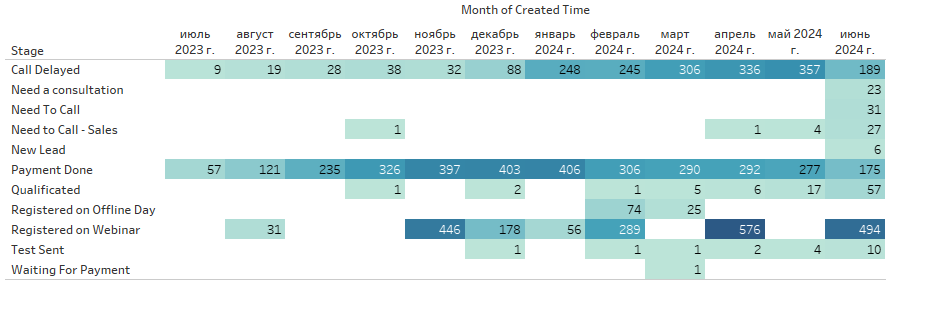

## Key Performance Indicators

- **Call Delayed:** This metric has shown a downward trend from 357 in June 2024 to 189 in the same month. This may indicate an improvement in customer service quality.
- **Payment Done:** This metric demonstrates a steady increase from 57 in July 2023 to 277 in May 2024. This may suggest an increase in sales volume or an improvement in the payment process.
- **Registered on Webinar:** This metric peaked in October 2023 (446) and then decreased to 494 in June 2024. This may reflect changes in the company's marketing strategies.

## Possible Areas for Improvement

- **Need to Call - Sales:** This metric remains low, which may indicate a need to improve the process of attracting new clients.
- **New Lead:** This metric also remains low, which may suggest a need to strengthen marketing efforts to generate new leads.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading data
data = pd.read_pickle('deals_df.pkl')

# Converting dates to datetime format
data['Created Time'] = pd.to_datetime(data['Created Time'])
data['Closing Date'] = pd.to_datetime(data['Closing Date'])

# Calculating the duration of the deal closure
data['Duration'] = (data['Closing Date'] - data['Created Time']).dt.days

# Filtering data for analysis and creating a copy
filtered_deals = data[(data['Duration'] > 0) & (data['Closing Date'] < pd.Timestamp('2025-05-01'))].copy()

# Analyzing time trends: number of closed deals by month
filtered_deals['Month'] = filtered_deals['Closing Date'].dt.to_period('M')
monthly_closed_deals = filtered_deals.groupby('Month').size()

# Plotting the number of closed deals by month
plt.figure(figsize=(12, 6))
monthly_closed_deals.plot(kind='bar', color='skyblue')
plt.title('Number of Closed Deals by Month')
plt.xlabel('Months')
plt.ylabel('Number of Deals')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Analyzing the duration of deals
plt.figure(figsize=(12, 6))
plt.hist(filtered_deals['Duration'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Deal Closure Duration')
plt.xlabel('Number of Days')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Analyzing deal quality
quality_counts = data['Quality'].value_counts()

# Plotting the distribution of deal quality
plt.figure(figsize=(12, 6))
quality_counts.plot(kind='bar', color='coral')
plt.title('Distribution of Deal Quality')
plt.xlabel('Deal Quality')
plt.ylabel('Number of Deals')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Analyzing by marketing campaigns
campaign_counts = data['Campaign'].value_counts()

# Plotting the distribution of deals by campaigns
plt.figure(figsize=(12, 6))
campaign_counts.plot(kind='bar', color='gold')
plt.title('Distribution of Deals by Marketing Campaigns')
plt.xlabel('Campaign')
plt.ylabel('Number of Deals')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Loading data
deals = pd.read_pickle('deals_df.pkl')
deals['Closing Date'] = pd.to_datetime(deals['Closing Date'], format='%d.%m.%Y')
deals = deals[deals['Closing Date'] <= pd.Timestamp('2024-08-01')]
deals['Month'] = deals['Closing Date'].dt.to_period('M')

# Grouping data
grouped_data = deals.groupby(['Month', 'Quality'], observed=False).size().unstack(fill_value=0)

# Creating the plot
fig = go.Figure()

for column in grouped_data.columns:
    fig.add_trace(go.Bar(
        x=grouped_data.index.astype(str),
        y=grouped_data[column],
        name=str(column),
        opacity=0.9
    ))

fig.update_layout(
    barmode='stack',
    title='Distribution of Number and Quality of Deals',
    xaxis_title='Month of Deal Closure',
    yaxis_title='Number of Deals',
    xaxis={'tickangle': 45},
    legend_title='Deal Quality',
    template='plotly_white',
    height=500,
    width=900
)

fig.show()
